# Pymaceuticals Inc.
---

### Analysis

- Mice who underwent treatment with Capomulin had, on average, a significantly smaller final tumor volume than mice who underwent treatment with Ceftamin or Infubinol.  However, the mice who were treated with Capomulin had roughly the same final tumor volume as those treated with Ramicane. This data, illustrated in the box and whisker plot, may be skewed by the fact that only the final recorded time point for each mouse was taken into account. This final recorded time point varied greatly from mouse to mouse, with some final timepoints being as low as 0, while others were as high as 45. This skew appears to be least present in the data for mice treated with Capomulin as evidenced by the fact that the lowest maximum time point value for mice in this regiment is 10. Further analysis of the final timepoints would be necessary in order to make a more definitive statement. 


- Mouse l509 was singled out for an analysis of how its tumor volume progressed over time. Mouse l509 was an ideal candidate for such an analysis because its tumor volume was measured throughout the entire range of time points (0 - 45). Although the tumor volume increased between time points 0 and 20, it decreased drastically in the remainder of the time frame. In the course of the study, the initial tumor volume of mouse l509 decreased by 7.8% (45 mm3 at time point 0 and 41.5 mm3 at time point 45). Although this decrease suggests that the Capomulin regimen helped to reduce tumor volume for mouse l509, it is not certain that other factors did not play a role in the measured decrease. A further analysis and comparison of other individual mice who were treated with Capomulin from time point 0 to time point 45 would provide more meaningful insight into the efficacy of Capomulin.


- As evidenced by a correlation coefficient value, r, of 0.842. there is a strong positive correlation between the weight of a mouse treated with Capomulin and its average tumor volume. This implies that the efficacy of Capomulin correlates negatively with the weight of the mouse being treated. A closer look at the statistical analysis reveals that this dataset is reliable. This dataset has a p-value of only 1.32 x 10-7, meaning that the data is statistically significant. The data also has a relatively low standard error of 0.128, meaning that the mean of this sample only differs from the mean of the population by 0.128. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#reorganize columns
merged_data = merged_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
                           "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
    

# Display the data table for preview
merged_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
5,k403,25,33.464577,1,Ramicane,Male,21,16
6,k403,30,31.099498,1,Ramicane,Male,21,16
7,k403,35,26.546993,1,Ramicane,Male,21,16
8,k403,40,24.365505,1,Ramicane,Male,21,16
9,k403,45,22.050126,1,Ramicane,Male,21,16


In [3]:
len(merged_data["Mouse ID"].unique())

249

In [4]:
#find duplicate rows
duplicate = merged_data[merged_data.duplicated(["Timepoint", "Mouse ID"])]

#display duplicate rows
duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.000000,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#display all rows (including duplicates) for mouse g989 
mouse_g989 = merged_data.loc[merged_data["Mouse ID"] == 'g989']
mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#remove all rows for Mouse ID 'g989'
merged_data = merged_data.loc[merged_data["Mouse ID"] != "g989" ] 

In [7]:
#count new number of mice in dataframe
len(merged_data["Mouse ID"].unique())

248

<font size="5">Summary Statistics</font>

In [8]:
#groupby and calculate stat values
mean_tumor = merged_data.groupby(["Drug Regimen"]).mean()
median_tumor = merged_data.groupby(["Drug Regimen"]).median()
variance_tumor = merged_data.groupby(["Drug Regimen"]).var()
std_tumor = merged_data.groupby(["Drug Regimen"]).std()
std_err_tumor = merged_data.groupby(["Drug Regimen"]).sem()

#select an individual column
meanTV = mean_tumor["Tumor Volume (mm3)"]
medianTV = median_tumor["Tumor Volume (mm3)"]
varianceTV = variance_tumor["Tumor Volume (mm3)"]
stdTV = std_tumor["Tumor Volume (mm3)"]
std_errTV = std_err_tumor["Tumor Volume (mm3)"]

tumor_volume = pd.DataFrame({"Mean Tumor Volume":meanTV,
                             "Median Tumor Volume":medianTV,
                             "Tumor Volume Variance":varianceTV,
                             "Tumor Volume Std. Dev.":stdTV,
                             "Tumor Volume Std. Err.":std_errTV
                            })
                
tumor_volume

C:\Users\13148\AppData\Local\Temp\ipykernel_7204\1086828937.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor = merged_data.groupby(["Drug Regimen"]).mean()
C:\Users\13148\AppData\Local\Temp\ipykernel_7204\1086828937.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor = merged_data.groupby(["Drug Regimen"]).median()
C:\Users\13148\AppData\Local\Temp\ipykernel_7204\1086828937.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<font size="5">Bar and Pie Charts</font>

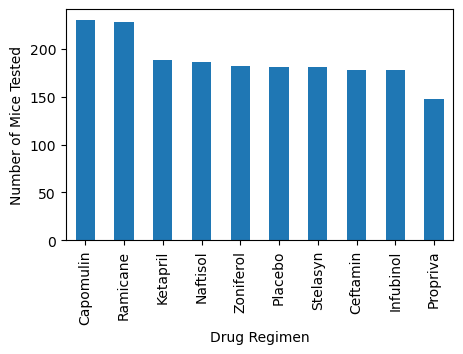

In [9]:
# bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# group by drug regimen and count timepoints for each drug
tests = merged_data.groupby(["Drug Regimen"])["Timepoint"].count()

#creating new data frame with 'tests'
timepoints = pd.DataFrame({"Number of Mice Tested":tests})

#putting new data frame in descending order
timepoints = timepoints.sort_values("Number of Mice Tested",ascending=False)

timepoints.plot(kind="bar", ylabel="Number of Mice Tested", figsize=(5,3), legend=False);


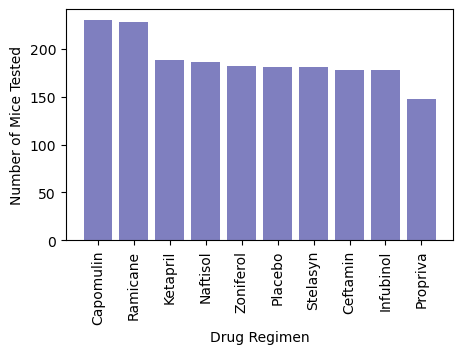

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# using "timepoints" DF from previous cell
x_axis = np.arange(len(timepoints))        

tick_locations = [value for value in x_axis]
 
plt.figure(figsize=(5,3))

years = []
for x in range(1996, 2023):
    years.append(x)

plt.bar(x_axis, timepoints["Number of Mice Tested"], color='navy', alpha=0.5, align="center")
plt.xticks(tick_locations, timepoints.index, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


plt.show()

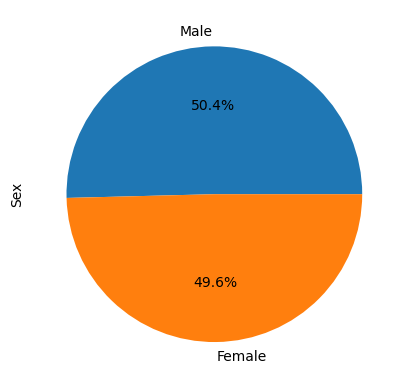

In [11]:
# pie plot showing the distribution of female versus male mice using Pandas

#removing mouse g989 from pre-merged DF 'mouse_metadata'
mouse_data = mouse_metadata[mouse_metadata["Mouse ID"]!='g989']

mouse_data2 = pd.DataFrame(mouse_data["Sex"].value_counts())

mouse_data2.plot(kind="pie", y = "Sex", autopct="%1.1f%%" ,legend=False);

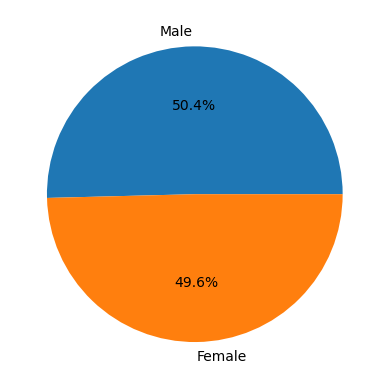

In [12]:
# bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#creating lists for plot
sex = [] 
count = []

for x in (0,1):
    sex.append(mouse_data2.index[x])
    count.append(mouse_data2["Sex"][x])

plt.pie(count, labels=sex, autopct="%1.1f%%");

<font size="5">Bar and Pie Charts</font>

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = merged_data.groupby(["Mouse ID"]).max()

max_time2 = max_timepoint["Timepoint"].sort_values(ascending=True)

max_time = pd.DataFrame({"Timepoint":max_time2})



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time_data = pd.merge(max_time, merged_data, on=['Mouse ID',"Timepoint"], how="inner")
max_time_data.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b447,0,45.000000,0,Ceftamin,Male,2,30
1,x226,0,45.000000,0,Ceftamin,Male,23,28
2,f932,0,45.000000,0,Ketapril,Male,15,29
3,x336,0,45.000000,0,Naftisol,Female,4,29
4,l872,0,45.000000,0,Placebo,Male,19,30
5,h428,0,45.000000,0,Ketapril,Female,1,27
6,o848,0,45.000000,0,Stelasyn,Female,14,27
7,t573,0,45.000000,0,Ceftamin,Female,15,27
8,v199,0,45.000000,0,Naftisol,Female,17,29
9,n482,0,45.000000,0,Propriva,Female,4,29


In [14]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_capo = []
tumor_ram = []
tumor_inf = []
tumor_ceft = []

# loops through treatment list
for x in range(0,len(treatments)):

    drug = treatments[x]
    
    # loops through max_time_data DF
    # pulls tumor volume
    # adds tumor volume to list for mouse's corresponding drug treatment
    for y in range(0, len(max_time_data)):
        
        if max_time_data["Drug Regimen"][y] == drug:
            
            if drug == 'Capomulin':
                tumor_capo.append(max_time_data["Tumor Volume (mm3)"][y])
            elif drug == 'Ramicane':
                tumor_ram.append(max_time_data["Tumor Volume (mm3)"][y])
            elif drug == 'Infubinol':
                tumor_inf.append(max_time_data["Tumor Volume (mm3)"][y])
            elif drug == 'Ceftamin':
                tumor_ceft.append(max_time_data["Tumor Volume (mm3)"][y])
                
                
tumor = pd.DataFrame({"Capomulin": tumor_capo,
                      "Ramicane": tumor_ram,
                      "Infubinol": tumor_inf,
                      "Ceftamin": tumor_ceft
                     
                     })

tumor

,Capomulin,Ramicane,Infubinol,Ceftamin
0,39.952347,43.166373,47.010364,45.000000
1,46.539206,44.183451,46.250112,45.000000
2,30.485985,38.342008,36.321346,45.000000
3,38.753265,43.419381,45.699331,45.000000
4,32.377357,36.561652,51.542431,47.784682
5,31.896238,30.638696,54.048608,46.784535
6,31.023923,37.225650,50.005138,48.722078
7,23.343598,30.276232,55.650681,56.057749
8,41.581521,40.667713,57.031862,52.925348
9,40.728578,33.397653,54.656549,57.918381


In [15]:
len(tumor)

25

In [14]:
# stat calculations

# Capomulin
quartiles_capo = tumor["Capomulin"].quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
IQR_capo = upperq_capo - lowerq_capo

lower_b_capo = lowerq_capo - (1.5*IQR_capo)
upper_b_capo = upperq_capo + (1.5*IQR_capo)

# empty list to store outlier values
capo_outliers = []

# loop through tumor DF to find and print outliers
for x in range(0,len(tumor)):
    if (tumor["Capomulin"][x] > upper_b_capo) or (tumor["Capomulin"][x] < lower_b_capo):
        capo_outliers.append(tumor["Capomulin"][x])
print(f" Campomulin's potential outliers: {capo_outliers}")

########################################################################################
        
# Ramicane
quartiles_ram = tumor["Ramicane"].quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
IQR_ram = upperq_ram - lowerq_ram

lower_b_ram = lowerq_ram - (1.5*IQR_ram)
upper_b_ram = upperq_ram + (1.5*IQR_ram)

ram_outliers = []
for x in range(0,len(tumor)):
    if (tumor['Ramicane'][x] > upper_b_ram) or (tumor['Ramicane'][x] < lower_b_ram):
        ram_outliers.append(tumor['Ramicane'][x])
print(f" Ramicane's potential outliers: {ram_outliers}")

########################################################################################

# Infubinol
quartiles_inf = tumor["Infubinol"].quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
IQR_inf = upperq_inf - lowerq_inf

lower_b_inf = lowerq_inf - (1.5*IQR_inf)
upper_b_inf = upperq_inf + (1.5*IQR_inf)

inf_outliers = []
for x in range(0,len(tumor)):
    if (tumor['Infubinol'][x] > upper_b_inf) or (tumor['Infubinol'][x] < lower_b_inf):
        inf_outliers.append(tumor['Infubinol'][x])
print(f" Infubinol's potential outliers: {inf_outliers}")

########################################################################################

# Ceftamin
quartiles_ceft = tumor["Ceftamin"].quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
IQR_ceft = upperq_ceft - lowerq_ceft

lower_b_ceft = lowerq_ceft - (1.5*IQR_ceft)
upper_b_ceft = upperq_ceft + (1.5*IQR_ceft)

ceft_outliers = []
for x in range(0,len(tumor)):
    if (tumor['Ceftamin'][x] > upper_b_ceft) or (tumor['Ceftamin'][x] < lower_b_ceft):
        ceft_outliers.append(tumor['Ceftamin'][x])
print(f" Ceftamin's potential outliers: {ceft_outliers}")




        


 Campomulin's potential outliers: []
 Ramicane's potential outliers: []
 Infubinol's potential outliers: [36.3213458]
 Ceftamin's potential outliers: []


In [15]:
# create series for each drug
capo = tumor["Capomulin"]
ram = tumor["Ramicane"]
inf = tumor["Infubinol"]
ceft = tumor["Ceftamin"]

# put series in one list
plot_data = [capo, ram, inf, ceft]

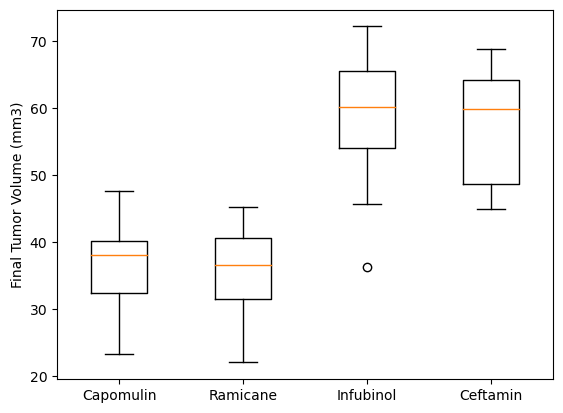

In [16]:
# plot boxplot
plt.figure()
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(plot_data)
plt.xticks([1,2,3,4], treatments)
plt.show()

In [17]:
# means and medians of final tumor volume for the 4 drug regiments
print("Capomulin mean = " + str(capo.mean()))
print("Capomulin median = " + str(capo.median()))
print("")
print("Ramicane mean = " + str(ram.mean()))
print("Ramicane median = " + str(ram.median()))
print("")
print("Infubinol mean = " + str(inf.mean()))
print("Infubinol median = " + str(inf.median()))
print("")
print("Ceftamin mean = " + str(ceft.mean()))
print("Ceftamin median = " + str(ceft.median()))

Capomulin mean = 36.667567719199994
Capomulin median = 38.1251644

Ramicane mean = 36.1913904284
Ramicane median = 36.56165229

Infubinol mean = 58.1782457852
Infubinol median = 60.16518046

Ceftamin mean = 57.7539768252
Ceftamin median = 59.85195552


<font size="5">Line and Scatter Plots</font>

In [18]:
# line plot of tumor volume vs. time point for a mouse treated with Capomulin

# select rows including Mouse ID l509
l509 = merged_data.loc[merged_data["Mouse ID"]=="l509"]
l509


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
371,l509,0,45.000000,0,Capomulin,Male,17,21
372,l509,5,45.851193,0,Capomulin,Male,17,21
373,l509,10,46.759074,0,Capomulin,Male,17,21
374,l509,15,47.488599,1,Capomulin,Male,17,21
375,l509,20,48.070452,2,Capomulin,Male,17,21
376,l509,25,44.006257,2,Capomulin,Male,17,21
377,l509,30,44.708055,2,Capomulin,Male,17,21
378,l509,35,40.207288,2,Capomulin,Male,17,21
379,l509,40,40.770813,2,Capomulin,Male,17,21
380,l509,45,41.483008,3,Capomulin,Male,17,21


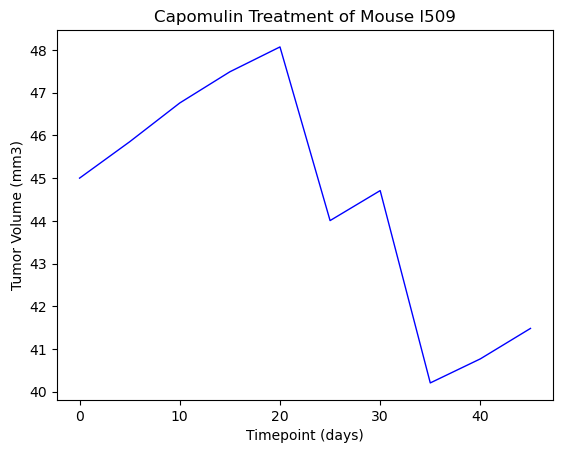

In [19]:
# generate line plot
x_axis = l509["Timepoint"]
y_axis = l509["Tumor Volume (mm3)"]

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment of Mouse l509")

plt.plot(x_axis, y_axis, marker="", color="blue", linewidth=1, label="Celsius");


In [20]:
# scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# select rows for Capomulin
cap = merged_data.loc[merged_data["Drug Regimen"]=="Capomulin"]

# group Mouse ID's and calculate average values
cap2 = cap.groupby(cap["Mouse ID"]).mean()
cap2.head(40)

C:\Users\13148\AppData\Local\Temp\ipykernel_26732\3000207645.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap2 = cap.groupby(cap["Mouse ID"]).mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


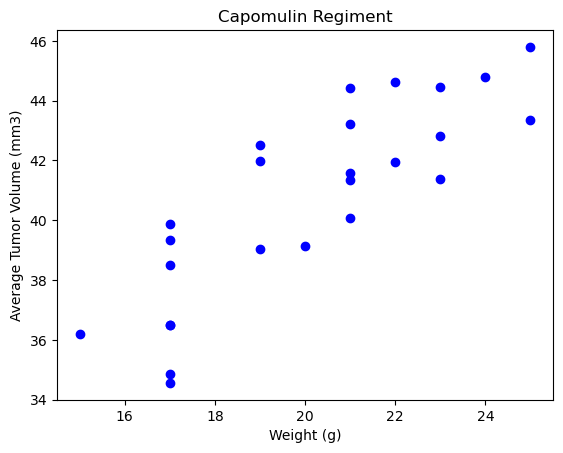

In [21]:
plt.scatter(cap2['Weight (g)'],cap2['Tumor Volume (mm3)'],c="blue")

plt.title("Capomulin Regiment")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

<font size="5">Correlations and Regression</font>

In [22]:
# calculate values for regression line
cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(cap2['Weight (g)'],cap2['Tumor Volume (mm3)'])


In [23]:
print("r-value = " + str(cap_r))
print("p-value = " + str(cap_p))
print("standard error of the mean = " + str(cap_std_err))

r-value = 0.8419363424694721
p-value = 1.3225722434712404e-07
standard error of the mean = 0.12754359033201323


In [24]:
# regression line equation
cap_fit = cap_slope * cap2['Weight (g)'] + cap_int


The correlation between mouse weight and the averag tumor volume is 0.84


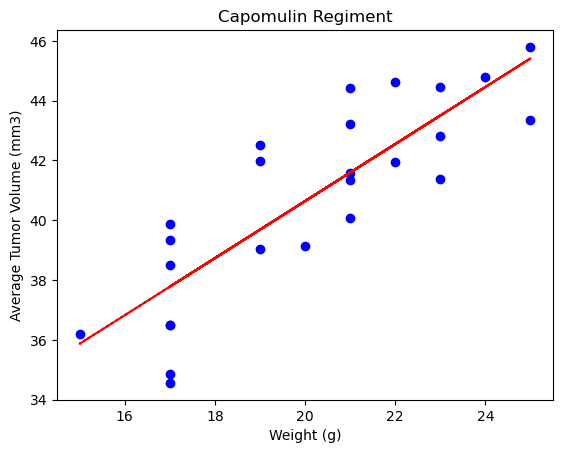

In [26]:
# print r value (rounded to 2 decimals)
print(f"The correlation between mouse weight and the averag tumor volume is {round(cap_r,2)}")

plt.scatter(cap2['Weight (g)'],cap2['Tumor Volume (mm3)'],c="blue")

# plot regression line
plt.plot(cap2['Weight (g)'],cap_fit,"--",c="red")

plt.title("Capomulin Regiment")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()